## Dependencies

### Library Installation (if needed)

In [28]:
#! pip install -qUr requirements.txt

In [29]:
from methods.screener_methods import *
from tqdm import tqdm
import pandas as pd

### Single import

,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,Momentum Score,P/E Score,ROA Score,PB Score,...,P/E,ROA%,Earnings pr. Share,Price to Book,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,AMBU-B.CO,Ambu A/S,Sell,-0.62,-0.58,-0.05,0.01,-1.17,0.78,-0.19,...,38.82,6.61,2.28,3.91,0.0,0.0,Healthcare,Medical Devices,Denmark,False


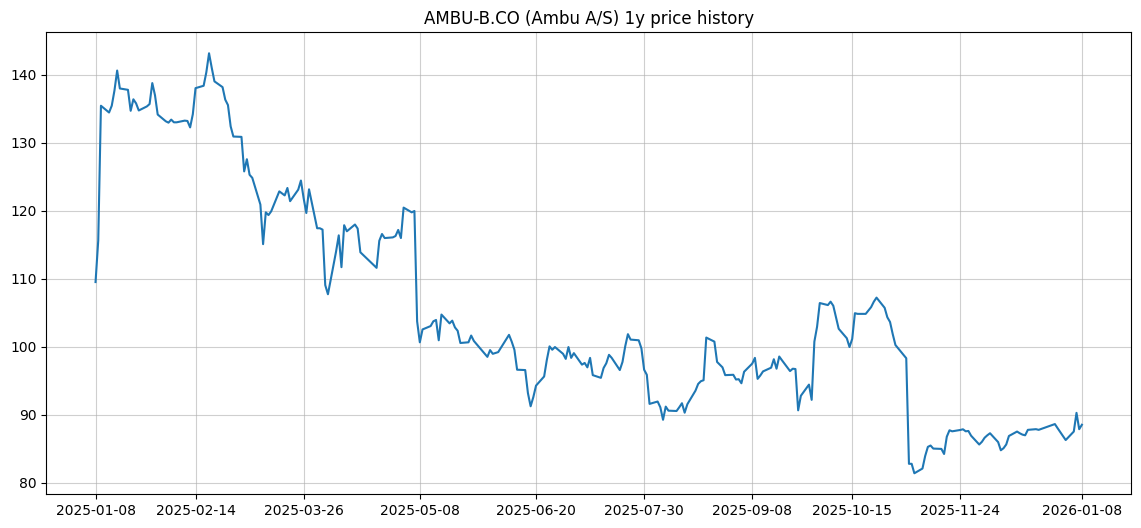

50d Average Change%: 0.004950911


In [30]:
symbol = "AMBU-B.CO"
stock = Stock(symbol)
display(stock.summary())
stock.price_graph("1y")
print(f"50d Average Change%: {stock.momentum}")


### Screener

In [31]:
symbol_list = "simple" #"simple", "danish", "filtered", "all"

if symbol_list == "all":
    symbols = (
        pd.read_csv("../data/tickers/tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].to_list()
    )
elif symbol_list == "filtered":
    symbols = pd.read_csv("../data/tickers/screener_filtered_tickers.csv")["Ticker"].tolist()
elif symbol_list == "danish":
    symbols = pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist()
else:
    symbols = pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].tolist()
symbols = list(set(symbols))

In [32]:
import sys, io
df = pd.DataFrame()
for symbol in tqdm(symbols, smoothing=0):
    old_stderr = sys.stderr
    sys.stderr = io.StringIO()
    try:
        df = pd.concat([df, Stock(symbol).summary()])
    except Exception:
        pass
    finally:
        sys.stderr = old_stderr
df = df.sort_values(by="Recommendation Score", ascending=False)
display(df)
if symbol_list == "simple":
    df.to_csv("../data/screener_results/simple_screener_results.csv", index=False)
elif symbol_list == "danish":
    df.to_csv("../data/screener_results/danish_screener_results.csv", index=False)
elif symbol_list == "filtered" or symbol_list == "all":   
    df.to_csv("../data/screener_results/screener_results.csv", index=False)
    df["Ticker"].to_csv("../data/tickers/screener_filtered_tickers.csv", index=False)

100%|██████████| 74/74 [00:50<00:00,  1.46it/s]


,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,Momentum Score,P/E Score,ROA Score,PB Score,...,P/E,ROA%,Earnings pr. Share,Price to Book,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,BAVA.CO,Bavarian Nordic A/S,Buy,2.48,2.08,0.36,0.04,1.04,0.92,0.12,...,6.48,7.78,30.70,1.18,0.0,0.02,Healthcare,Biotechnology,Denmark,False
0,HLUN-A.CO,H. Lundbeck A/S A,Buy,2.05,1.89,0.03,0.14,0.87,0.95,0.07,...,10.12,8.28,3.84,1.53,0.0,0.11,Healthcare,Drug Manufacturers - Specialty & Generic,Denmark,True
0,TRMD,TORM plc,Buy,2.05,1.75,0.21,0.10,0.97,0.65,0.14,...,8.30,5.99,2.73,1.03,0.0,0.07,Energy,Oil & Gas Midstream,United Kingdom,True
0,GUBRA.CO,Gubra A/S,Buy,2.01,1.88,-0.00,0.13,1.08,1.00,-0.20,...,4.91,78.15,106.08,7.01,0.0,0.09,Healthcare,Biotechnology,Denmark,True
0,ZEAL.CO,Zealand Pharma A/S,Buy,1.93,2.07,0.02,-0.16,1.09,1.00,-0.02,...,4.65,33.45,91.31,1.97,0.0,-0.13,Healthcare,Biotechnology,Denmark,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,BAESY,BAE Systems PLC,Sell,-0.94,-1.28,0.16,0.18,-1.05,-0.03,-0.20,...,31.47,4.27,3.52,22.71,0.0,0.19,Industrials,Aerospace & Defense,United Kingdom,False
0,VWS.CO,Vestas Wind Systems A/S,Sell,-1.16,-1.47,0.16,0.16,-0.79,-0.48,-0.20,...,26.03,3.19,6.96,6.97,0.0,0.13,Industrials,Specialty Industrial Machinery,Denmark,False
0,SAAB-B.ST,SAAB AB ser. B,Sell,-1.18,-1.55,0.18,0.19,-1.20,-0.16,-0.20,...,66.83,3.99,9.59,8.42,0.0,0.25,Industrials,Aerospace & Defense,Sweden,False
0,SOLAR-B.CO,Solar B A/S,Sell,-1.52,-1.81,0.22,0.07,-1.20,-0.76,0.15,...,57.77,2.15,3.54,0.87,0.0,0.04,Technology,Electronics & Computer Distribution,Denmark,False
